<a href="https://colab.research.google.com/github/DineshDevPandey/Pytorch_basics/blob/master/7_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

## Basic idea of linear regression

**Linear Regression :** LR tries to find a optimal line/ plane/ hyperplane which can best fit the dataset dataset. <br>
Genaral equation of plane is **y = w<sup>T</sup>x + b**

In [0]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [0]:
def forward(x):
  y = w*x + b
  return y

In [170]:
x = torch.tensor([[2], [3]])
print(forward(x))

tensor([[ 7],
        [10]], grad_fn=<AddBackward0>)


## Better Implementation of LR


In [0]:
from torch.nn import Linear

In [172]:
torch.manual_seed(1)

# linear model takes two param num of input , num of output
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [173]:
x = torch.tensor([[3.0], [4.4]])
print(model(x))

tensor([[1.1044],
        [1.8258]], grad_fn=<AddmmBackward>)


## Even better implementation of LR

In [0]:
import torch.nn as nn

# nn.module is a base class for all neural network models

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
    
  def forward(self, x):
    pred = self.linear(x)
    return pred


In [175]:
torch.manual_seed(1)
model = LR(1, 1)

x = torch.tensor([[3.0], [4.0]])
model.forward(x)

tensor([[1.1044],
        [1.6197]], grad_fn=<AddmmBackward>)

In [0]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

## Create dataset

In [0]:
import matplotlib.pyplot as plt

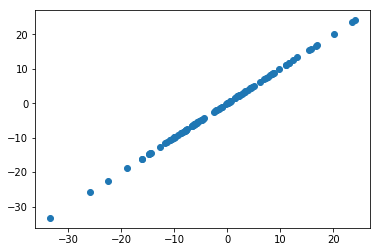

In [178]:
# create 100 points from a normal distribution
X = torch.randn(100, 1) * 10
y = X
plt.plot(X.numpy(), y.numpy(), 'o')

As expected data is appears like a line. Lets add some noice to y values.

Text(0.5, 0, 'X')

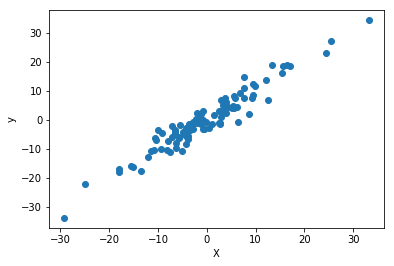

In [179]:
# create 100 points from a normal distribution
X = torch.randn(100, 1) * 10

# add noice to x (data is centered to mean = 0 and var = 1 so multiply it by 3)
y = 3 * torch.randn(100, 1) + X
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('X')

0.5152631998062134
-0.44137823581695557


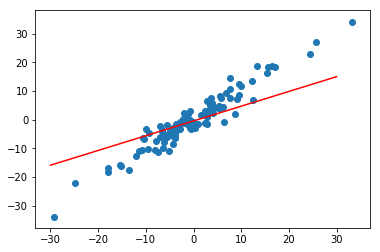

In [180]:
def plot_fit(title):
  plt.title = title
  w1, b1 =get_params()
  print(w1)
  print(b1)
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  
  # plot the seperateing line using weight and bias returned by model
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()
  
plot_fit('Initial model')

We can clearly see that this is not the line that we are expecting. We need to use **Gradient Descent** to find the optimal line.

## Pytorch linear regression

In [0]:
# Inbuilt mean square loss
criterian = nn.MSELoss()

# stochastic gradent descent 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [182]:
# model training

epochs = 100
losses = []
for i in range(epochs):
  # make the prediction
  y_pred = model.forward(X)
  
  # calculate loss
  loss = criterian(y_pred, y)
  print("epoch : ", i, "  loss : ", loss.item())
  losses.append(loss)
  
  # gradients accumulate in each iteration so before recalculating it, set it to zero. 
  optimizer.zero_grad()
  
  # to compute the derivative/gradient 
  loss.backward()
  
  # after calculating gradients we update the model parameters
  optimizer.step()


epoch :  0   loss :  31.370759963989258
epoch :  1   loss :  26.57585334777832
epoch :  2   loss :  22.768245697021484
epoch :  3   loss :  19.744230270385742
epoch :  4   loss :  17.342098236083984
epoch :  5   loss :  15.433533668518066
epoch :  6   loss :  13.916725158691406
epoch :  7   loss :  12.710882186889648
epoch :  8   loss :  11.751873016357422
epoch :  9   loss :  10.988826751708984
epoch :  10   loss :  10.381354331970215
epoch :  11   loss :  9.897417068481445
epoch :  12   loss :  9.511577606201172
epoch :  13   loss :  9.203653335571289
epoch :  14   loss :  8.957627296447754
epoch :  15   loss :  8.760783195495605
epoch :  16   loss :  8.603032112121582
epoch :  17   loss :  8.476362228393555
epoch :  18   loss :  8.37441635131836
epoch :  19   loss :  8.292144775390625
epoch :  20   loss :  8.225541114807129
epoch :  21   loss :  8.171420097351074
epoch :  22   loss :  8.1272554397583
epoch :  23   loss :  8.09104061126709
epoch :  24   loss :  8.061179161071777
epoc

Text(0.5, 0, 'epoch')

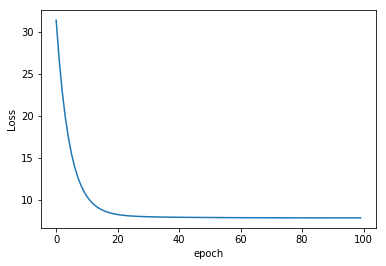

In [183]:
# chage of loss
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

1.0116064548492432
0.1151190772652626


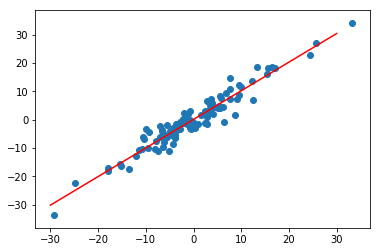

In [184]:
plot_fit("Trained Model")

**This is the best fitted line.**